# Exercise: Taxonomy Induction

<br>
In this exercise, we will perform the various steps commonly employed for unsupervised taxonomy induction from text corpora. Taxonomy induction from text typically consists of three main steps:

<ol>
  <li><b>Relations Extraction:</b> In this step, we use lexico-syntactic patterns to extract <b>IsA</b> relations from text. An example of IsA relation is (<i>apple, fruit</i>), which implies that <i>apple</i> is a type of fruit.</li>
  <br>
  <li><b>Initial Graph Construction:</b> In this step, we aggregate the extracted IsA relations to construct a potentially-noisy initial hypernym graph.</li>
  <br>
  <li><b>Graph Pruning:</b> In the final step, we perform some pruning or optimization steps to induce the a final clean taxonomy.</li>
</ol>  

<br>
We will describe these steps in detail in the rest of this exercise. 


## Question 1 - Relations Extraction


In this part of the exercise, we will run a small-scale extraction of IsA relations and inspect the results. Relations extraction uses lexico-syntactic patterns to identify IsA relations from unstructured text. Examples of lexico-syntactic patterns include:

 Lexico-syntactic pattern | Sample matching text
  ------|------------------
  <b>X</b> is a <b>Y</b>     | <i><b>apple</b> is a <b>fruit</b></i>, <i><b>switzerland</b> is a <b>country</b></i>
  <b>X</b> such as <b>Y</b>     | <i><b>fruits</b> such as <b>mango</b></i>, <i><b>scientists</b> such as <b>Einstein</b></i>
  <b>X</b> is an example of <b>Y</b>     | <i><b>iphone</b> is an example of <b>smartphone</b></i>
  
  <br>
  In this exercise, we will use such lexico-syntactic patterns to identify IsA relations from text.
  
  
  ###  Question 1.a

  Load the given file <b>wiki_food_en.txt</b> into memory using the following code:
  
  
  

In [1]:
def load_text_file(filename):
    file_text = []
    with open(filename) as fp:
        for line in fp:
            file_text.append(line.strip().lower())
    return " ".join(file_text)

file_text = load_text_file("wiki_food_en.txt")

<br>
The following code uses the regular expression library to detect lexico-syntactic patterns in the file_text. The example below uses the regular expression "X is a Y". Fill in the blanks (...):


In [2]:
import re

def find_matches(file_text, regexp_string):
    #Compile a regular expression 
    regexp = re.compile(regexp_string)
    
    #Find all matches with the given regular expression
    matches = re.findall(regexp, file_text)
    
    return matches

isa_matches = find_matches(file_text, "[a-z]+ is a [a-z]+")

In [3]:
for item in isa_matches:
    print(item, '\n')

word is a compound 

ajiaco is a popular 

ajiaco is a hearty 

ajiaco is a quite 

bana is a small 

hull is a reticulated 

but is a popular 

almond is a nutritionally 

serving is a rich 

oil is a rich 

and is a glyceryl 

hull is a reticulated 

but is a popular 

almond is a nutritionally 

serving is a rich 

oil is a rich 

and is a glyceryl 

it is a popular 

and is a popular 

it is a popular 

it is a common 

starter is a substitute 

it is a simple 

it is a coarse 

it is a plump 

cake is a white 

foam is a type 

that is a bright 

protein is a soy 

starch is a tenderizing 

cake is a type 

anise is a food 

it is a key 

which is a cool 

which is a direct 

butter is a family 

syrup is a minority 

butter is a product 

it is a critical 

refrigeration is a way 

it is a method 

there is a widespread 

canning is a process 

sauce is a lot 

butter is a much 

sauce is a homemade 

apricot is a small 

there is a considerable 

page is a candidate 

it is a ma

<br>
 ###  Question 1.b

Run the above code for relations extraction with the following lexico-syntactic patterns:

<ol>
  <li>X such as Y</li>
  <li>such X as Y</li>
<li>X and other Y</li>  
</ol>

Manually inspect the results and compute the accuracies of first 20 matches for each lexico-syntactic pattern. What do you observe? Is there any important difference between patterns no. 1,2 and 3? 

In [6]:
matches = find_matches(file_text, "[a-z]+ such as [a-z]+")
for i, m in enumerate(matches[:20]):
    print(f"{str(i+1)}. {m}")

1. pig such as the
2. beverages such as cocktails
3. emulsifiers such as egg
4. varieties such as allioli
5. pests such as the
6. ceremonies such as weddings
7. pests such as navel
8. versions such as the
9. pests such as the
10. ceremonies such as weddings
11. pests such as navel
12. versions such as the
13. illnesses such as infections
14. pans such as a
15. manufacturing such as acetic
16. aid such as modified
17. session such as of
18. plants such as pear
19. foods such as apple
20. cheeses such as cheddar


2, 3, 6, 10, 13, 19, 20 are correct.

In [7]:
matches = find_matches(file_text, "such [a-z]+ as [a-z]+")
for i, m in enumerate(matches[:20]):
    print(f"{str(i+1)}. {m}")

1. such serves as an
2. such flavors as chocolate
3. such factors as territorial
4. such countries as germany
5. such foods as pizza
6. such words as the
7. such factors as territorial
8. such companies as arienti
9. such ingredients as water
10. such ingredients as water
11. such places as thailand
12. such places as thailand
13. such parameters as the
14. such species as the
15. such nougat as the
16. such items as sliced
17. such species as the
18. such conditions as abscesses
19. such plants as the
20. such items as dry


2,4,5,9,10,11,12,18 are correct.

In [8]:
matches = find_matches(file_text, "[a-z]+ and other [a-z]+")
for i, m in enumerate(matches[:20]):
    print(f"{str(i+1)}. {m}")

1. france and other countries
2. figs and other recipes
3. azerbaijan and other central
4. olives and other tree
5. azerbaijan and other central
6. olives and other tree
7. rye and other flours
8. france and other european
9. sauces and other sauces
10. mixes and other gluten
11. petals and other flower
12. petals and other flower
13. tariff and other supports
14. wars and other fairtrade
15. wine and other ingredients
16. date and other agronomic
17. soups and other foods
18. patties and other bulk
19. spices and other substances
20. sugars and other components


1,4,6,7,15,17,19,20 are correct.

The main difference between patterns 1,2 vs. 3 are that the hypernym appears first in 1,2 whereas it appears later in the pattern 3. For example:

1. hypernym such as hyponym
2. such hypernym as hyponym
3. hyponym and other hypernym

## Question 2 - Graph Construction

As you noticed in the previous step, the output of lexico-syntactic patterns-based relations extraction contains significant noise. The task of noise removal is fairly involved and beyond the scope of this exercise. For further reading, we recommend this paper, which demonstrates a state-of-the-art effort for IsA relations extraction (<a href="http://webdatacommons.org/isadb/lrec2016.pdf">A Large Database of Hypernymy Relations Extracted from the Web</a>).

In this part of the exercise, we assume that IsA relations extracted using a state-of-the-art approach are already available. Given these relations, the aim of this step is to construct an initial potentially-noisy hypernym graph.

###  Question 2.a


Load the IsA relations of the food domain from the given file "food_isa_relations.txt" using the following code:

In [9]:
rels = []
with open("food_isa_relations.txt") as fp:
    for line in fp.readlines():
        toks = line.strip().split('\t')
        rels.append((toks[0],toks[1],float(toks[2])))

In python, graphs are better handled as a default 2-level dictionary. For example, the edge (<i>apple</i>,<i>fruit</i>, freq) is represented as a two-level map:

map['apple']['fruit'] = freq

The following code converts the IsA relations loaded from the file into a 2-level dictionary. Fill in the blanks:

In [10]:
from collections import defaultdict

noisy_relations = defaultdict(dict)
for hypo, hyper, freq in rels:
    noisy_relations[hypo][hyper] = freq

<br>

###  Question 2.b

The next step of taxonomy induction involves removing and filtering out noisy IsA relations. In a real scenario, this usually involves a wide variety of steps. However, in this exercise, we will implement only one step. In this step, we will sort all the hypernyms for each hyponym, and only retain top-5 hypernyms for each hyponym.

First, print the hypernyms of 'apple':

In [11]:
noisy_relations['apple']

{'fruit': 1.0,
 'company': 0.547120747653,
 'apple': 0.41334243636,
 'orange': 0.155466692675,
 'food': 0.147812587177,
 'vegetable': 0.132148274312,
 'tech company': 0.120745147762,
 'fruit tree': 0.115782511138,
 'tree': 0.110838111316,
 'crop': 0.0988772876235,
 'brand': 0.0915626602388,
 'hardware company': 0.0897298351702,
 'flavour': 0.0858994706649,
 'manufacturer': 0.079702775123,
 'rival': 0.0788062030625,
 'technology company': 0.0755438963724,
 'company in the world': 0.0747098410221,
 'tag': 0.0736281177128,
 'product': 0.0697003665663,
 'ingredient': 0.068957229831}

<br>
Fill in the blanks in the following code: 

In [13]:
for hypo in noisy_relations.keys():
    sorted_hypernyms = sorted(noisy_relations[hypo].items(), key = lambda x: x[1], reverse=True)
    noisy_relations[hypo] = {k:v for k,v in sorted_hypernyms[:5]}
    
# Printed filtered noisy relations.
noisy_relations['apple']   

{'fruit': 1.0,
 'company': 0.547120747653,
 'apple': 0.41334243636,
 'orange': 0.155466692675,
 'food': 0.147812587177}

###  Question 2.c

In the next step, we would first convert the set of filtered IsA relations into a graph. First install the library networkx and matplotlib:

   $ pip install networkx<br>
   
   $ pip install matplotlib
   


Further, use the following code:

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()

for hypo in noisy_relations.keys():
    for hyper in noisy_relations[hypo].keys():
        G.add_edge(hypo, hyper)
                

<br>
Print all the paths between the following terms (Hint: use the networkx function all_simple_paths):

1. 'apple' and 'food'
2. 'fusilli' and 'food'
3.  'okra' and 'food' 

Do you notice any relationship between the length of the path and its accuracy?

In [17]:
for p in nx.all_simple_paths(G, source='apple', target='food'):
    print(p)

['apple', 'fruit', 'food']
['apple', 'fruit', 'ingredient', 'food']
['apple', 'orange', 'fruit', 'food']
['apple', 'orange', 'fruit', 'ingredient', 'food']
['apple', 'food']


In [18]:
for p in nx.all_simple_paths(G, source='fusilli', target='food'):
    print(p)

['fusilli', 'pasta', 'food']
['fusilli', 'pasta', 'dish', 'food']
['fusilli', 'pasta', 'ingredient', 'food']


In [19]:
for p in nx.all_simple_paths(G, source='okra', target='food'):
    print(p)

['okra', 'vegetable', 'food']
['okra', 'vegetable', 'ingredient', 'food']


Longer paths are more inclined to contain noisy edges.

###  Question 2.d

In this step, we will now build a taxonomy. We will undertake the following steps:

<ol>
  <li> Let the vocabulary be {'apple', 'mango', 'peach', 'orange', 'banana'}.</li> 
<li> Let the root of the taxonomy be 'food'.</li> 
<li> Find all simple paths between terms in the vocabulary and the root. </li>
<li> Retain all simple paths of length $l$.
<li> Construct a graph by aggregatiing all the edges in the retained paths. </li>

The below code implements the above steps. Fill in the blanks:


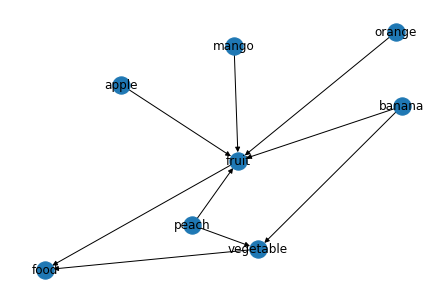

In [21]:
def select_paths(vocab, root, l):
    retained_paths = []
    for term in vocab:
        for path in nx.all_simple_paths(G, source=term, target=root):
            if len(path) == l:
                retained_paths.append(path)
    return retained_paths


def aggregate_paths(paths):
    agg_graph = defaultdict(dict)
    
    for path in paths:
        for i,term in enumerate(path[0:len(path) -1]):
            agg_graph[term][path[i+1]] = 1
            
    return agg_graph


V = ['apple', 'mango', 'peach', 'orange', 'banana']
root = 'food'

graph = aggregate_paths(select_paths(V, root, 3))
 

# Plot the graph
def plot_graph(graph):
    Gt = nx.DiGraph()
    for k in graph.keys():
        for k1 in graph[k].keys():
            Gt.add_edge(k,k1)
    nx.draw(Gt, with_labels=True)
    plt.show()
    
plot_graph(graph)

###  Question 2.e

Plot the aggregated graph using the previous steps but with different path lengths (For example, 2 or 4). What do you notice?

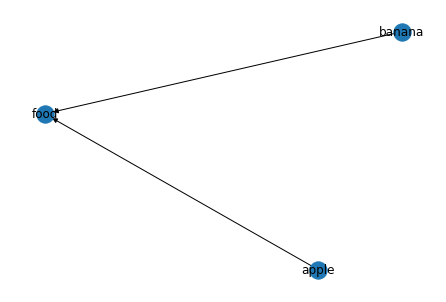

In [23]:
graph = aggregate_paths(select_paths(V, root, 2))
plot_graph(graph)

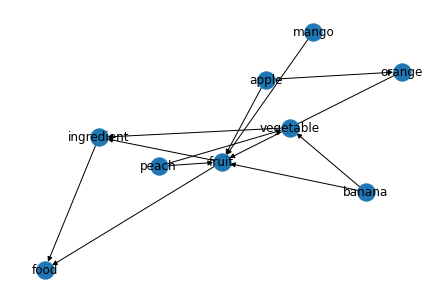

In [24]:
graph = aggregate_paths(select_paths(V, root, 4))
plot_graph(graph)

As length of path increases, so does the noise in the graph.

###  Question 2.f

Repeat steps from 2.b to 2.e but without filtering the noisy relations in step 2.b. What do you observe?

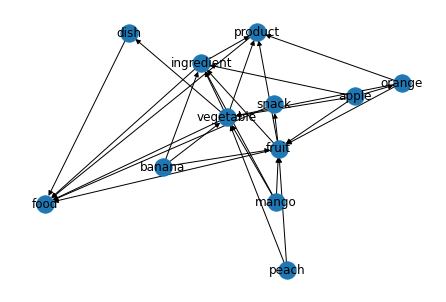

In [26]:
rels = []
with open("food_isa_relations.txt") as fp:
    for line in fp.readlines():
        toks = line.strip().split('\t')
        rels.append((toks[0],toks[1],float(toks[2])))
        
noisy_relations = defaultdict(dict)
for hypo, hyper, freq in rels:
    noisy_relations[hypo][hyper] = freq
    
G=nx.DiGraph()

for hypo in noisy_relations.keys():
    for hyper in noisy_relations[hypo].keys():
        G.add_edge(hypo, hyper)
    
graph = aggregate_paths(select_paths(V, root, 4))
plot_graph(graph)

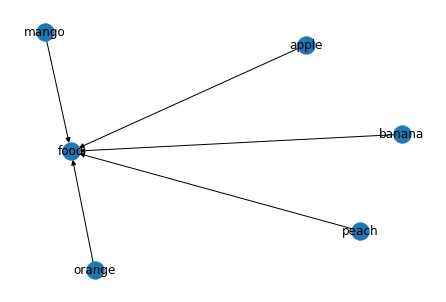

In [27]:
graph = aggregate_paths(select_paths(V, root, 2))
plot_graph(graph)

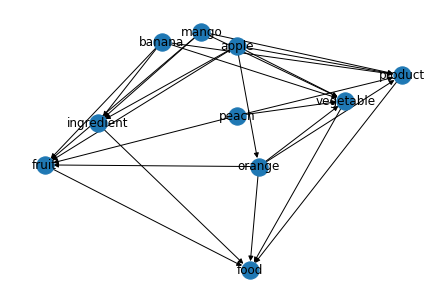

In [28]:
graph = aggregate_paths(select_paths(V, root, 3))
plot_graph(graph)

Overall, the following observations can be made:

Noisy relations result in significantly noisy hypernym graphs. Therefore, filtering out the relations (step 2.b) improves the accuracy. However, it also results lower recall. This is evident from the graphs constructed using paths of length = 2. 

Overall, the key challenge of taxonomy induction is to remove as much as noise as possible in each step (relations extraction, graph construction, graph pruning), while retaining as many accurate relations as possible. In this exercise, we introduced very simple techniques for filtering. However, the current state of the art involves many complicated graph optimization algorithms. The following papers provide further reading for interested readers:

a) <a href="http://www.cs.cmu.edu/~hovy/papers/10EMNLP-taxnomylearning.pdf">A Semi-Supervised Method to Learn and Construct Taxonomies using the Web</a>
<br>
b) <a href="https://www.aclweb.org/anthology/J/J13/J13-3007.pdf">OntoLearn Reloaded: A Graph-Based Algorithm for Taxonomy Induction</a><br>
c) <a href="https://infoscience.epfl.ch/record/227966/files/cikm_subseq.pdf">Taxonomy Induction Using Hypernym Subsequences</a>
